# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import time 
import math

Using TensorFlow backend.


In [2]:
df = pd.read_csv('MSFT.csv',delimiter=',')
df=df.set_index(['date'])
df.drop(df.columns[[5,6,7,9]],axis=1,inplace=True)
df.head(5)

,open,high,low,close,volume,vwap,changeOverTime
date,,,,,,,
2014-02-21,33.7514,34.1162,33.6803,33.7870,38030656,33.8728,0.000000
2014-02-24,33.5290,33.7826,33.3956,33.5290,32143395,33.6365,-0.007636
2014-02-25,33.4579,33.6714,33.2266,33.3956,30867657,33.4736,-0.011584
2014-02-26,33.4313,33.5735,33.0843,33.3333,41042629,33.3624,-0.013428
2014-02-27,33.3155,33.7070,33.1198,33.6803,33919024,33.4569,-0.003158


# EDA

In [3]:
df.describe()

,open,high,low,close,volume,vwap,changeOverTime
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000
mean,62.467056,62.995852,61.902420,62.480956,3.056797e+07,62.481560,0.849260
std,23.751446,23.968194,23.450436,23.717775,1.503531e+07,23.695803,0.701979
min,33.315500,33.573500,33.084300,33.333300,7.425603e+06,32.288400,-0.013428
25%,42.446125,43.016800,42.141175,42.550775,2.161842e+07,42.607400,0.259383
50%,54.316350,54.701500,53.969300,54.387700,2.731550e+07,54.384000,0.609723
75%,81.589100,82.109075,81.015525,81.667375,3.480885e+07,81.535575,1.417124
max,114.434800,115.188300,113.949000,114.623200,2.025265e+08,114.534000,2.392524


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 2014-02-21 to 2019-02-20
Data columns (total 7 columns):
open              1258 non-null float64
high              1258 non-null float64
low               1258 non-null float64
close             1258 non-null float64
volume            1258 non-null int64
vwap              1258 non-null float64
changeOverTime    1258 non-null float64
dtypes: float64(6), int64(1)
memory usage: 78.6+ KB


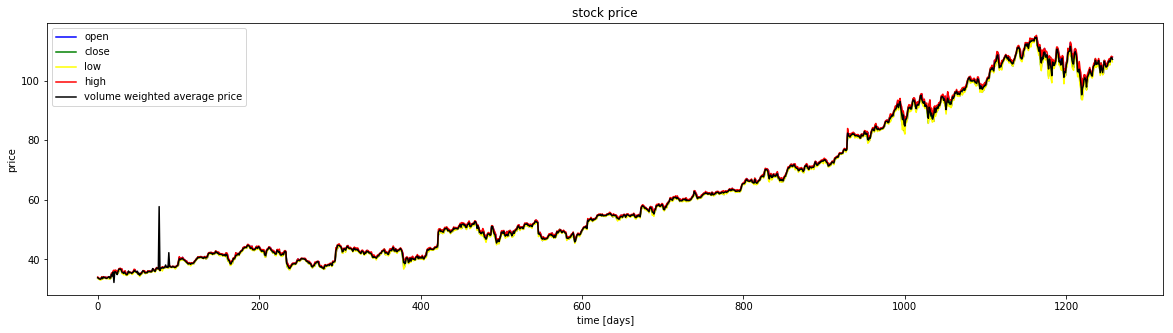

In [5]:
plt.figure(figsize=(20, 5))
plt.subplot(1,1,1)
plt.plot(df.open.values,color='blue',label='open')
plt.plot(df.close.values,color='green',label='close')
plt.plot(df.low.values,color='yellow',label='low')
plt.plot(df.high.values,color='red',label='high')
plt.plot(df.vwap.values,color='black',label='volume weighted average price')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
plt.show()

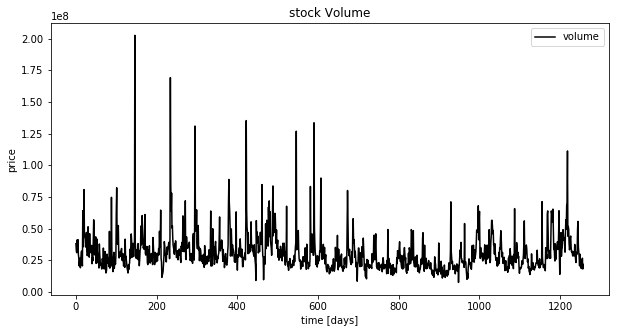

In [6]:
plt.figure(figsize=(10, 5))
plt.subplot(1,1,1)
plt.plot(df.volume.values,color='black',label='volume')
plt.title('stock Volume')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
plt.show()

# Pre-processing
Using MinMaxScaler to Normalise the data

Volume Weighted Average Price is used for prediction.The rest of the attributes are only for analysis and visualisation purpose

In [7]:
df1=df
df.head()
df1.drop(df.columns[[0,1,2,3,4,6]],axis=1,inplace=True)
df1
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(df1)

In [8]:
train_size = int(len(df) * 0.70)
test_size = len(df) - train_size
train, test = df1[0:train_size,:], df1[train_size:len(df),:]
print(len(train),len(test))

880 378


Converting dataframe into a specific array structure (numpy) to feed the data into LSTM.

In [9]:
def create(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [10]:
look_back=1
trainX, trainY = create(train, look_back)
testX, testY = create(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX.shape

(878, 1, 1)

# Fitting LSTM Model

In [11]:
model = Sequential()
model.add(LSTM(5, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='RMSProp')
model.fit(trainX, trainY, epochs=100, batch_size=8, verbose=1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
878/878 [==============================] - 0s 436us/step - loss: 0.0179
Epoch 2/100
878/878 [==============================] - 0s 134us/step - loss: 0.0072
Epoch 3/100
878/878 [==============================] - 0s 135us/step - loss: 0.0049
Epoch 4/100
878/878 [==============================] - 0s 135us/step - loss: 0.0028
Epoch 5/100
878/878 [==============================] - 0s 142us/step - loss: 0.0011
Epoch 6/100
878/878 [==============================] - 0s 140us/step - loss: 3.1341e-04
Epoch 7/100
878/878 [==============================] - 0s 139us/step - loss: 2.3454e-04
Epoch 8/100
878/878 [==============================] - 0s 134us/step - loss: 2.3177e-04
Epoch 9/100
878/878 [==============================] - 0s 136us/step - loss: 2.3255e-04
Epoch 10/100
878/878 [==============================] - 0s 129us/step - loss: 2.3014e-04
Epoch 11/100
878/87

878/878 [==============================] - 0s 140us/step - loss: 2.1717e-04
Epoch 88/100
878/878 [==============================] - 0s 141us/step - loss: 2.2043e-04
Epoch 89/100
878/878 [==============================] - 0s 161us/step - loss: 2.1658e-04
Epoch 90/100
878/878 [==============================] - 0s 148us/step - loss: 2.2114e-04
Epoch 91/100
878/878 [==============================] - 0s 145us/step - loss: 2.2040e-04
Epoch 92/100
878/878 [==============================] - 0s 136us/step - loss: 2.1852e-04
Epoch 93/100
878/878 [==============================] - 0s 125us/step - loss: 2.2066e-04
Epoch 94/100
878/878 [==============================] - 0s 117us/step - loss: 2.1811e-04
Epoch 95/100
878/878 [==============================] - 0s 117us/step - loss: 2.1862e-04
Epoch 96/100
878/878 [==============================] - 0s 119us/step - loss: 2.1764e-04
Epoch 97/100
878/878 [==============================] - 0s 132us/step - loss: 2.1596e-04
Epoch 98/100
878/878 [============

# Optimiser used:RMSProp

Loss Metrics:Root Mean Square Error

About RMSProp brief:- The RMSprop optimizer is similar to the gradient descent algorithm with momentum. The RMSprop optimizer restricts the oscillations in the vertical direction. Therefore, we can increase our learning rate and our algorithm could take larger steps in the horizontal direction converging faster. The difference between RMSprop and gradient descent is on how the gradients are calculated. The value of momentum is denoted by beta and is usually set to 0.9.

# Prediction

In [12]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1.22 RMSE
Test Score: 2.91 RMSE


# Results and validation!

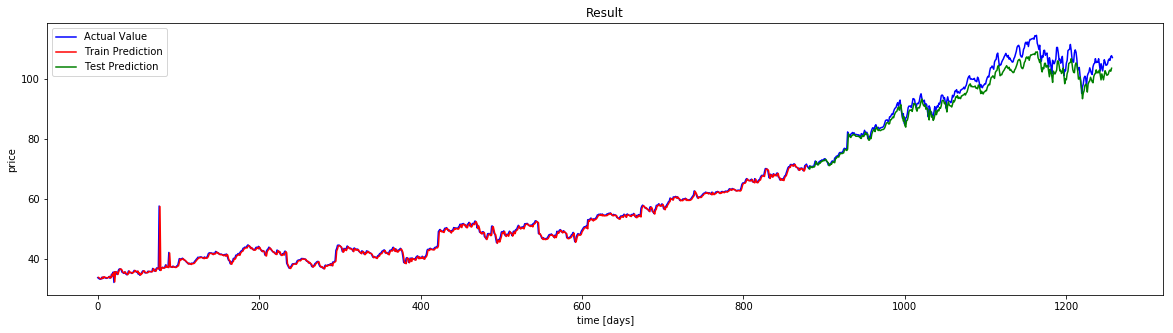

In [13]:
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df1)-1, :] = testPredict

plt.figure(figsize=(20, 5))
plt.subplot(1,1,1)
plt.plot(scaler.inverse_transform(df1),color='blue',label='Actual Value')
plt.plot(trainPredictPlot,color='red',label='Train Prediction')
plt.plot(testPredictPlot,color='green',label='Test Prediction')
plt.title('Result')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
plt.show()
predict=pd.DataFrame({'Predicted':testPredict[:,0]})
cc=df1[0:train_size,:]
predict.to_csv('output.csv')
predict.to_csv('given.csv')